In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl

# 设置中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False

<AxesSubplot:ylabel='Frequency'>

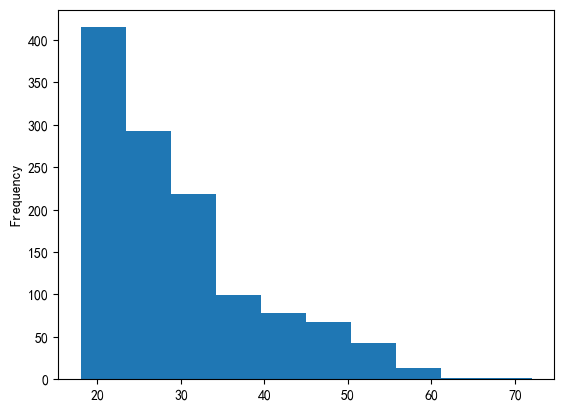

In [10]:
# age分布
file_data["age"].plot(kind="hist")

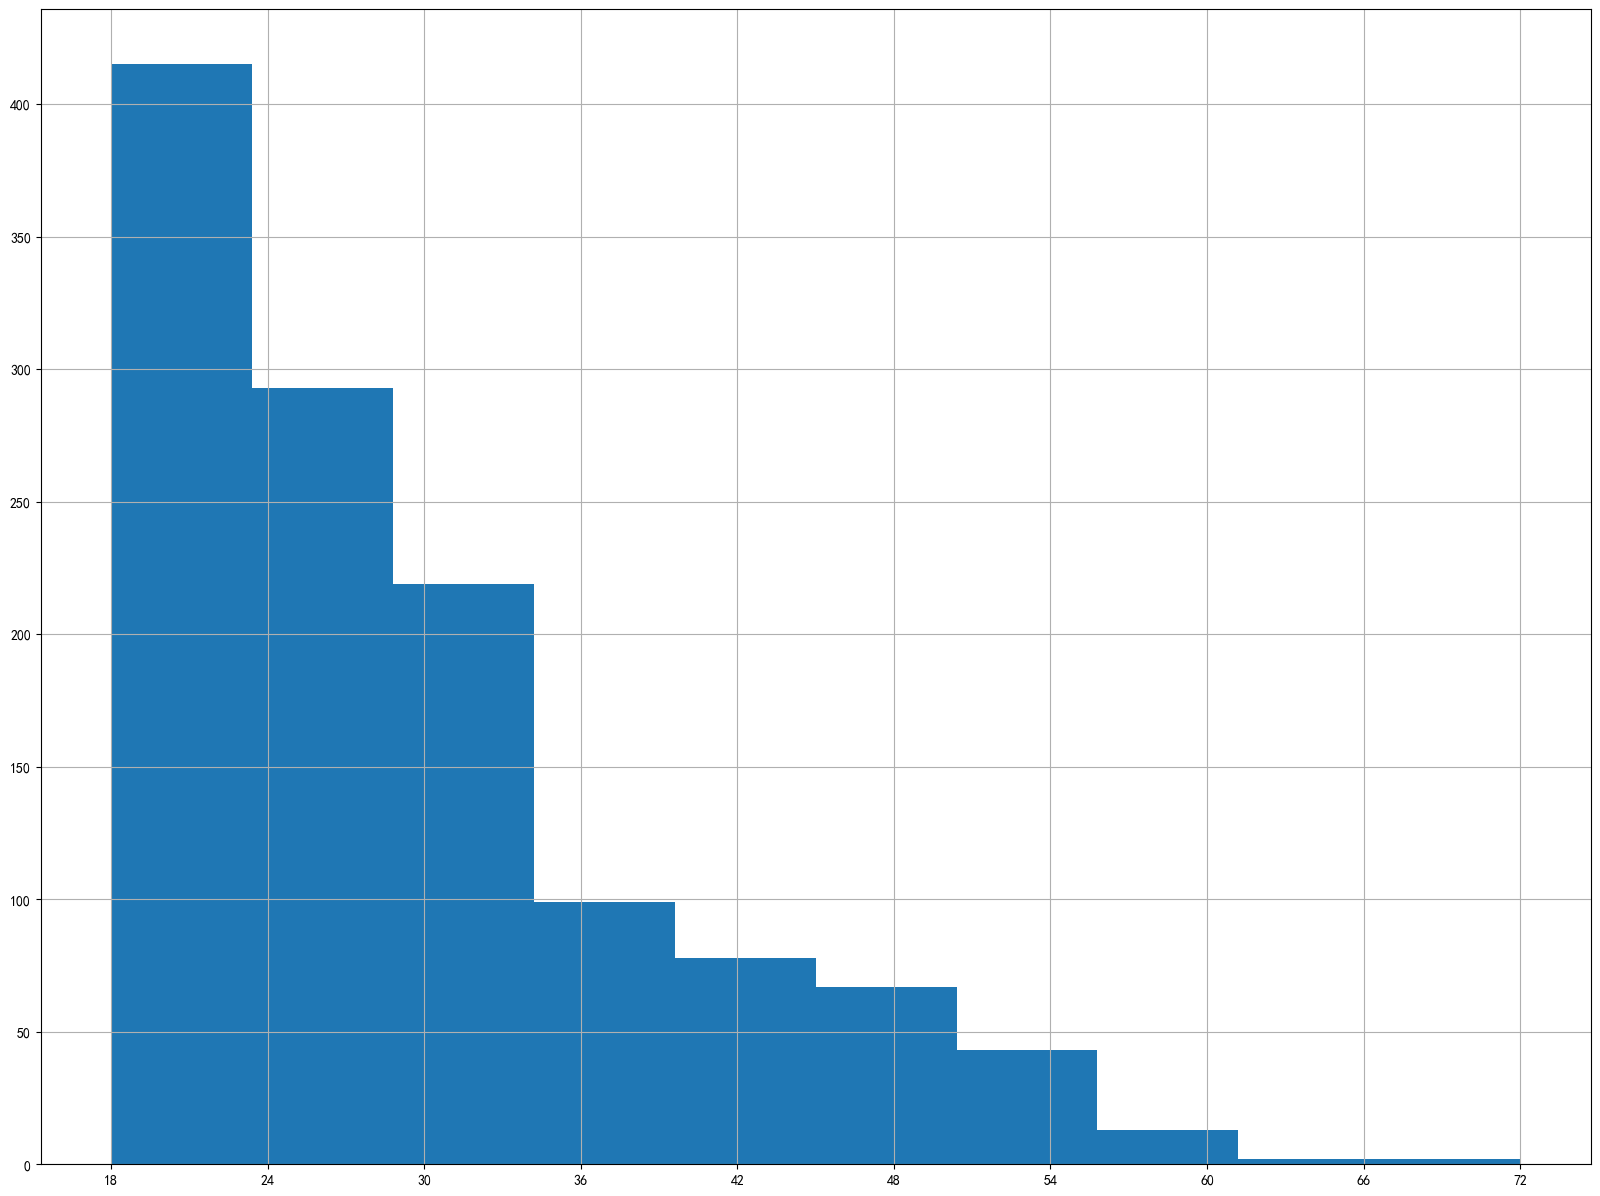

In [19]:
# 创建画布
plt.figure(figsize=(20, 15), dpi=100)
# 绘制图像
plt.hist(file_data["age"].values)
# 添加刻度
max_ = file_data["age"].max()
min_ = file_data["age"].min()
t1 = np.linspace(min_, max_, num=10)
plt.xticks(t1)

# 添加网格
plt.grid()
# 显示图像
plt.show()

In [20]:
file_data["age"].values

array([25, 44, 26, ..., 18, 38, 34], dtype=int64)

In [21]:
file_data["age"].max()

72

In [22]:
file_data["age"].min()

18

In [30]:
# 年龄划分
age_divide = [16, 20, 25, 30, 35, 40, 50, 60, 80]
age_cut = pd.cut(file_data["age"], age_divide)
age_cut

0       (20, 25]
1       (40, 50]
2       (25, 30]
3       (25, 30]
4       (40, 50]
          ...   
1226    (20, 25]
1227    (20, 25]
1228    (16, 20]
1229    (35, 40]
1230    (30, 35]
Name: age, Length: 1231, dtype: category
Categories (8, interval[int64, right]): [(16, 20] < (20, 25] < (25, 30] < (30, 35] < (35, 40] < (40, 50] < (50, 60] < (60, 80]]

In [32]:
age_cut_num = age_cut.describe()
age_cut_num

count         1231
unique           8
top       (20, 25]
freq           352
Name: age, dtype: object

In [34]:
# 图像可视化
age_per = (age_cut_num["freq"].values)

labels  = ['20以下', '20-25', '25-30', '30-35',
'35-40','40-50','50-60','60-80']

plt.figure(figsize=(20, 8), dpi=100)
# plt.axes(aspect=1) , autopct="%.2f %%"

plt.pie(x=age_per, labels=labels)


plt.legend()
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'values'

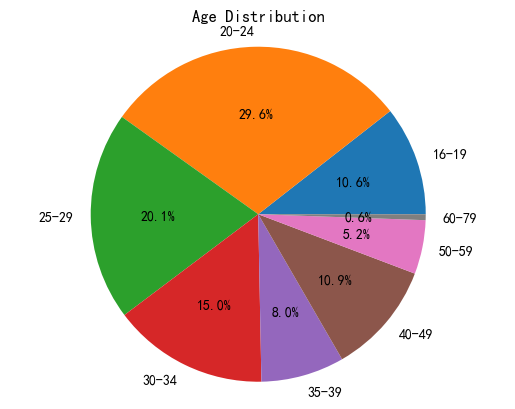

In [39]:
import matplotlib.pyplot as plt

# 年龄分割点
age_divide = [16, 20, 25, 30, 35, 40, 50, 80]

# 统计各个年龄范围的数量
age_ranges_count = [sum(1 for a in file_data["age"] if bin_start <= a < bin_end) for bin_start, bin_end in zip(age_divide[:-1], age_divide[1:])]

# 计算每个组的起始值和结束值，用于饼图的标签
age_ranges = [f"{age_divide[i]}-{age_divide[i+1]-1}" for i in range(len(age_divide)-1)]

# 绘制饼图
plt.pie(age_ranges_count, labels=age_ranges, autopct='%1.1f%%')
plt.title("Age Distribution")
plt.axis('equal')  # 使饼图保持圆形
plt.show()


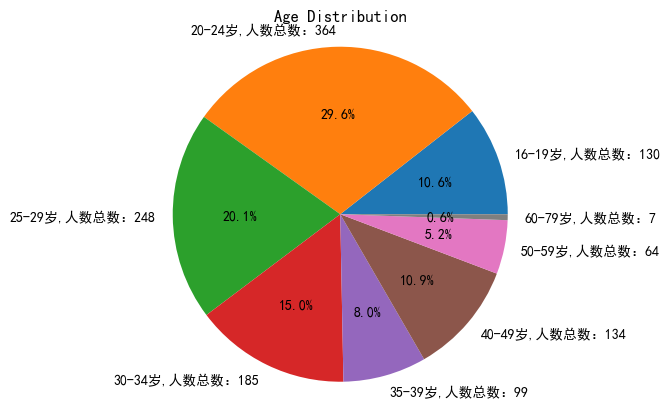

In [45]:
import matplotlib.pyplot as plt

# 统计各个年龄范围的数量
age_ranges_count = [sum(1 for a in file_data["age"] if bin_start <= a < bin_end) for bin_start, bin_end in zip(age_divide[:-1], age_divide[1:])]

# 计算每个组的起始值和结束值，用于饼图的标签
age_ranges = [f"{bin_start}-{bin_end-1}岁,人数总数：{count}" for bin_start, bin_end, count in zip(age_divide[:-1], age_divide[1:], age_ranges_count)]

# 绘制饼图
plt.pie(age_ranges_count, labels=age_ranges, autopct='%1.1f%%')
plt.title("Age Distribution")
plt.axis('equal')  # 使饼图保持圆形
plt.show()


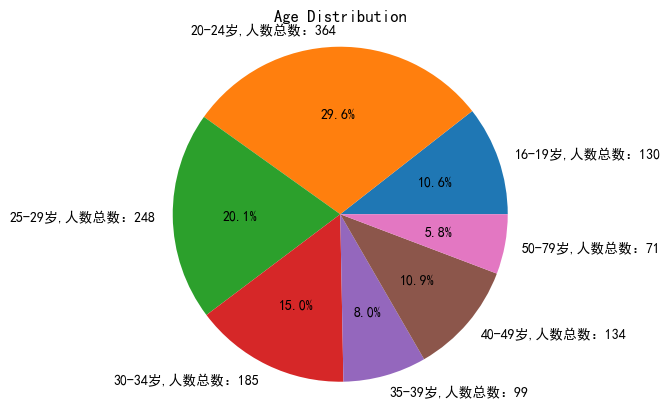

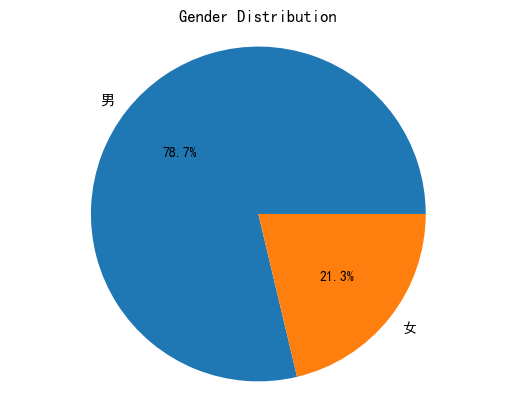

In [3]:
import matplotlib.pyplot as plt

# 年龄分割点
age_divide = [16, 20, 25, 30, 35, 40, 50, 80]
# 统计各个年龄范围的数量
age_ranges_count = [sum(1 for a in file_data["age"] if bin_start <= a < bin_end) for bin_start, bin_end in zip(age_divide[:-1], age_divide[1:])]

# 计算每个组的起始值和结束值，用于饼图的标签
age_ranges = [f"{bin_start}-{bin_end-1}岁,人数总数：{count}" for bin_start, bin_end, count in zip(age_divide[:-1], age_divide[1:], age_ranges_count)]

# 绘制年龄分布的饼图
plt.figure(1)
plt.pie(age_ranges_count, labels=age_ranges, autopct='%1.1f%%')
plt.title("Age Distribution")
plt.axis('equal')  # 使饼图保持圆形

# 性别分组统计数量
gender_counts = file_data["gender"].value_counts()

# 绘制性别分布的饼图
plt.figure(2)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.axis('equal')  # 使饼图保持圆形

plt.show()


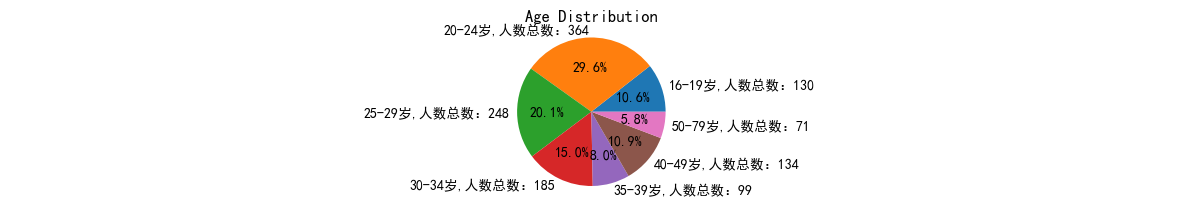

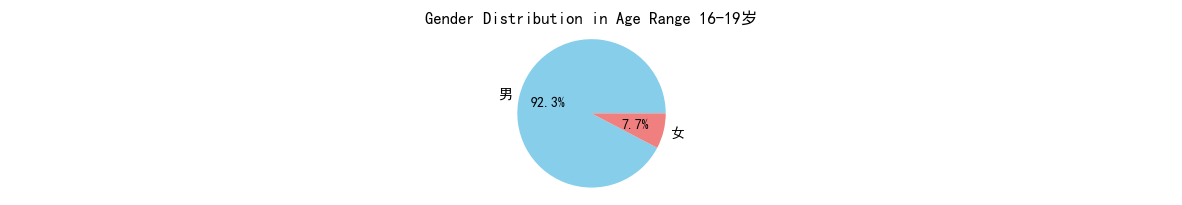

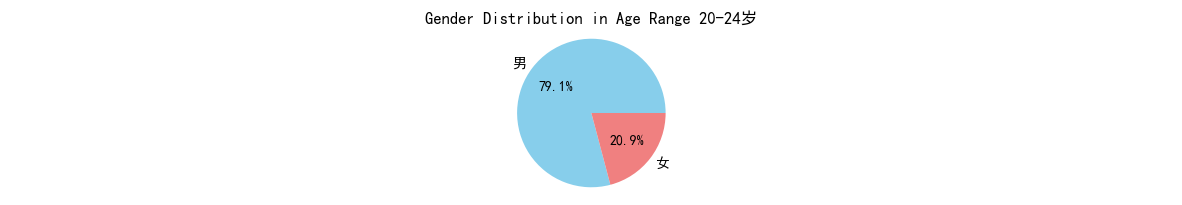

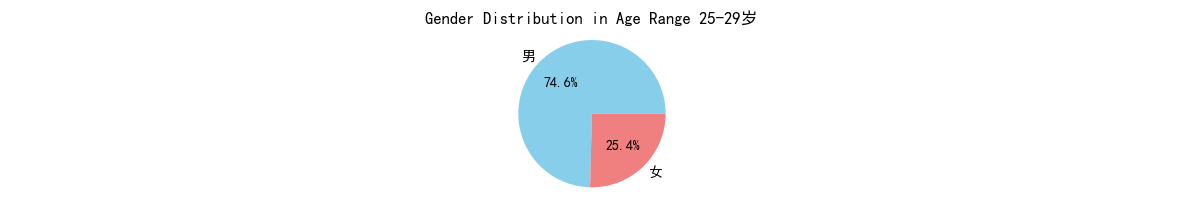

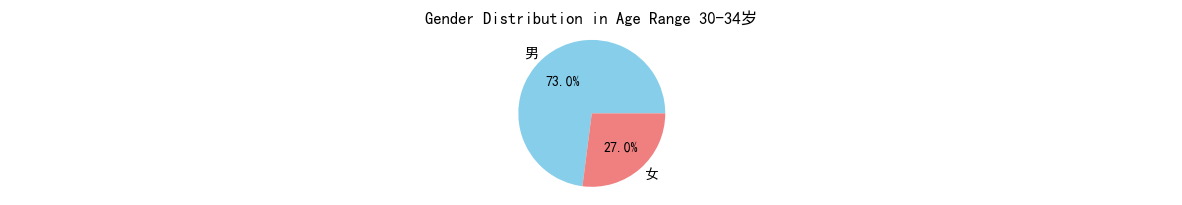

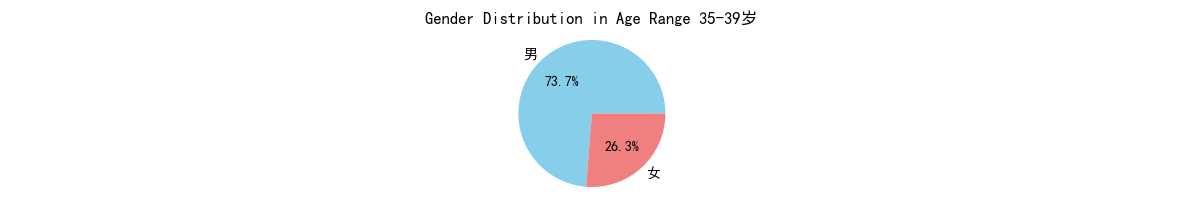

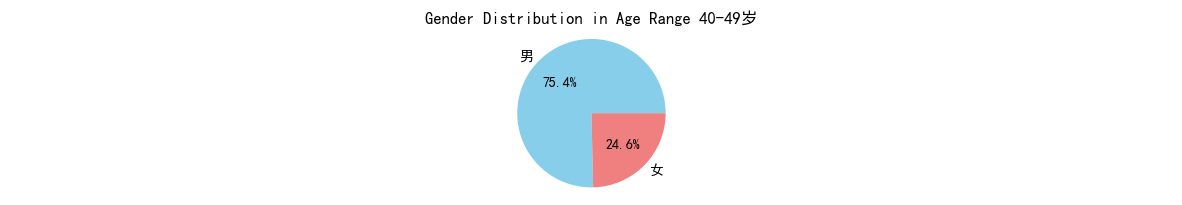

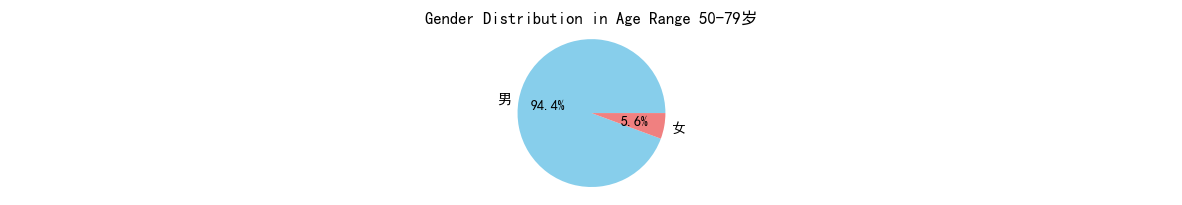

In [32]:
import matplotlib.pyplot as plt

# 年龄分割点
age_divide = [16, 20, 25, 30, 35, 40, 50, 80]
# 统计各个年龄范围的数量
age_ranges_count = [sum(1 for a in file_data["age"] if bin_start <= a < bin_end) for bin_start, bin_end in zip(age_divide[:-1], age_divide[1:])]

# 计算每个组的起始值和结束值，用于饼图的标签
age_ranges = [f"{bin_start}-{bin_end-1}岁,人数总数：{count}" for bin_start, bin_end, count in zip(age_divide[:-1], age_divide[1:], age_ranges_count)]

# 绘制年龄分布的饼图
plt.figure(figsize=(15, 20))
plt.subplot(8, 1, 1)
plt.pie(age_ranges_count, labels=age_ranges, autopct='%1.1f%%')
plt.title("Age Distribution")
plt.axis('equal')  # 使饼图保持圆形

# 分别统计每个年龄区间内不同性别的人数
age_gender_counts = []
for i in range(len(age_divide) - 1):
    age_gender_counts.append(file_data[(file_data["age"] >= age_divide[i]) & (file_data["age"] < age_divide[i + 1])]["gender"].value_counts())

# 绘制性别分布的饼图
colors = ['skyblue', 'lightcoral']
for i in range(0, len(age_gender_counts)):
    plt.figure(figsize=(15, 20))
    plt.subplot(8, 1, i+2)
    plt.pie(age_gender_counts[i], labels=age_gender_counts[i].index, colors=colors, autopct='%1.1f%%')
    plt.title(f"Gender Distribution in Age Range {age_divide[i]}-{age_divide[i+1]-1}岁")
    plt.axis('equal')  # 使饼图保持圆形
    plt.show()

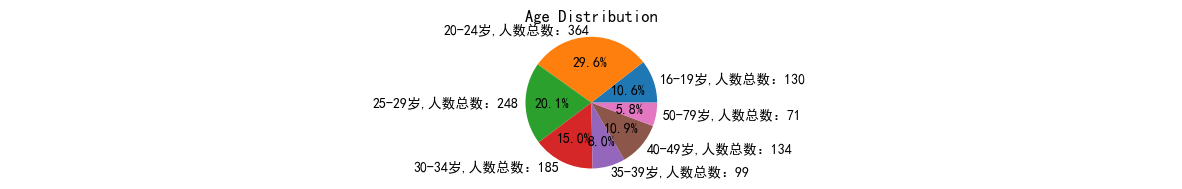

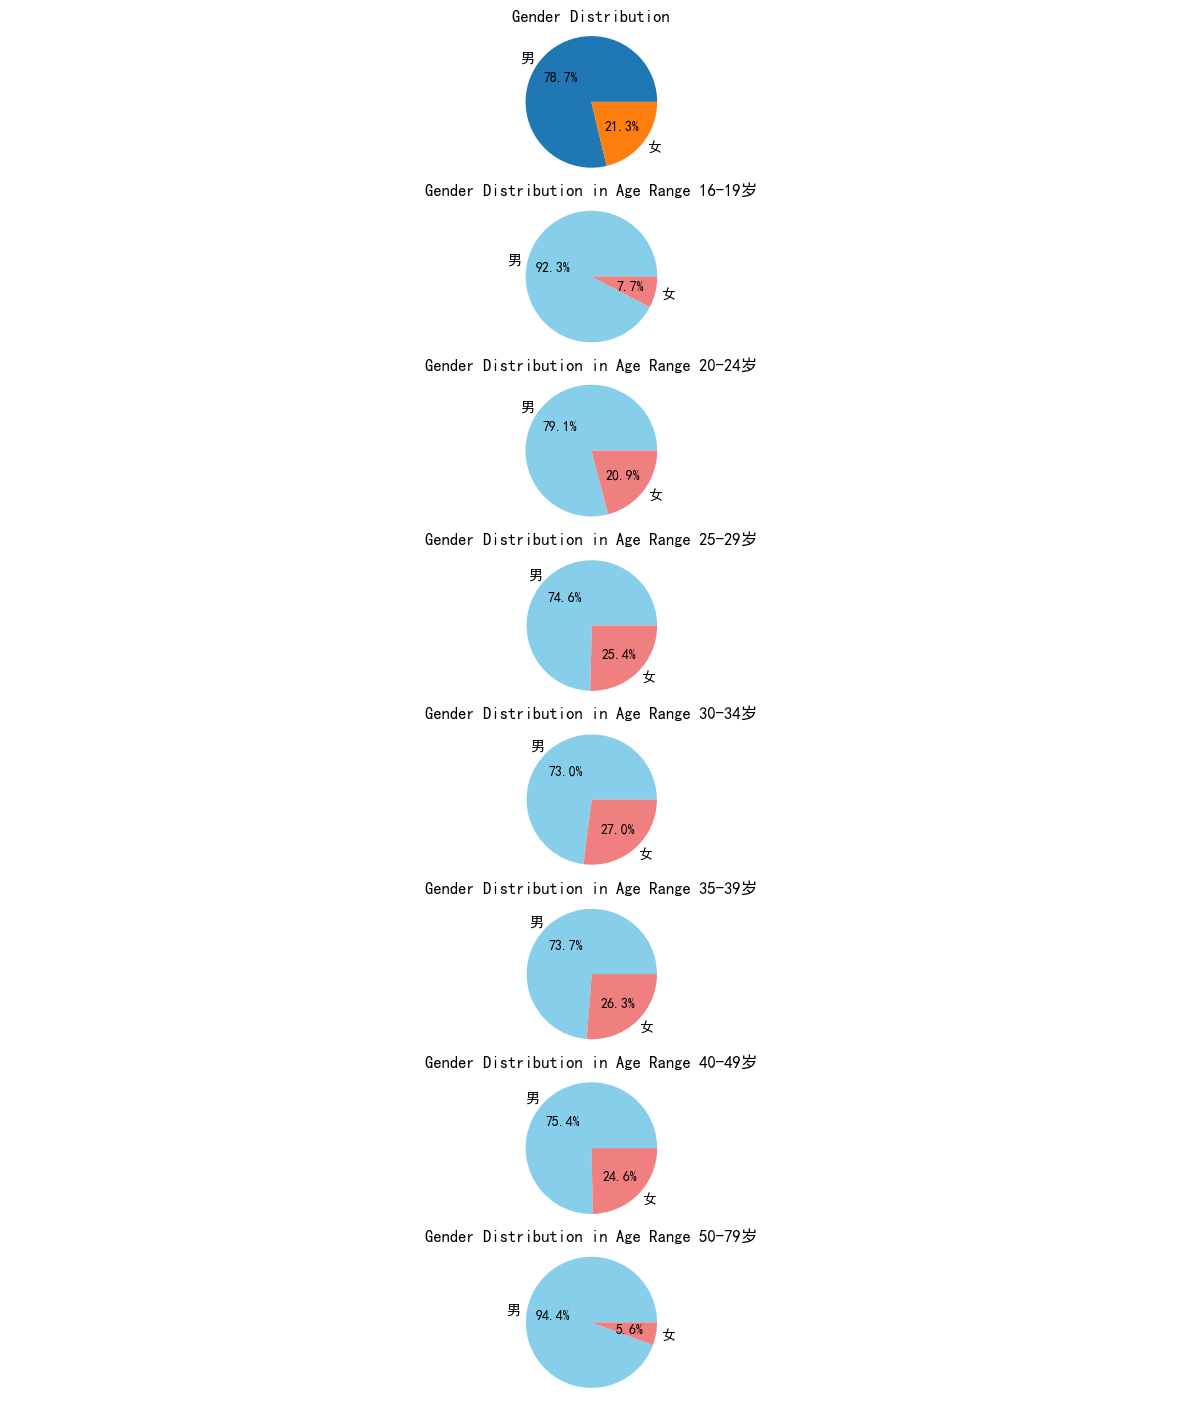

In [33]:
import matplotlib.pyplot as plt

# 年龄分割点
# ... (your code here)

# Create a single figure with multiple subplots
plt.figure(figsize=(15, 20))

# 绘制年龄分布的饼图
plt.subplot(9, 1, 1)
plt.pie(age_ranges_count, labels=age_ranges, autopct='%1.1f%%')
plt.title("Age Distribution")
plt.axis('equal')  # 使饼图保持圆形

# 分别统计每个年龄区间内不同性别的人数

# 性别分组统计数量
gender_counts = file_data["gender"].value_counts()

# Create a single figure with multiple subplots
plt.figure(figsize=(15, 20))

# 绘制年龄分布的饼图
plt.subplot(9, 1, 2)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.axis('equal')  # 使饼图保持圆形

# 绘制性别分布的饼图
colors = ['skyblue', 'lightcoral']
for i in range(0, len(age_gender_counts)):
    plt.subplot(9, 1, i+3)
    plt.pie(age_gender_counts[i], labels=age_gender_counts[i].index, colors=colors, autopct='%1.1f%%')
    plt.title(f"Gender Distribution in Age Range {age_divide[i]}-{age_divide[i+1]-1}岁")
    plt.axis('equal')  # 使饼图保持圆形

# Save the entire figure as an image
plt.savefig("all_pie_charts2.png")

# Show the figure
plt.show()


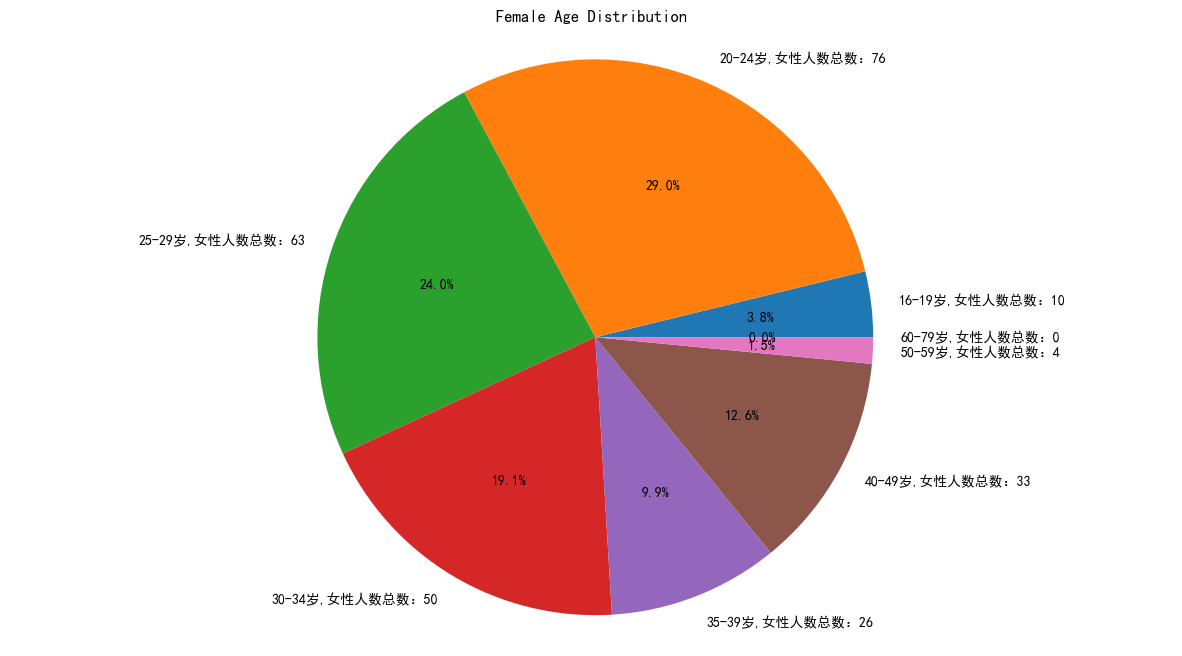

In [36]:
import matplotlib.pyplot as plt

# 年龄分割点
age_divide = [16, 20, 25, 30, 35, 40, 50, 60, 80]

# 统计各个年龄范围的女性数量
female_data = file_data[file_data["gender"] == "女"]
age_ranges_count = [sum(1 for age in female_data["age"] if bin_start <= age < bin_end) for bin_start, bin_end in zip(age_divide[:-1], age_divide[1:])]

# 计算每个组的起始值和结束值，用于饼图的标签
age_ranges = [f"{bin_start}-{bin_end-1}岁,女性人数总数：{count}" for bin_start, bin_end, count in zip(age_divide[:-1], age_divide[1:], age_ranges_count)]

# 绘制年龄分布的饼图
plt.figure(figsize=(15, 8))
plt.pie(age_ranges_count, labels=age_ranges, autopct='%1.1f%%')
plt.title("Female Age Distribution")
plt.axis('equal')  # 使饼图保持圆形
plt.show()


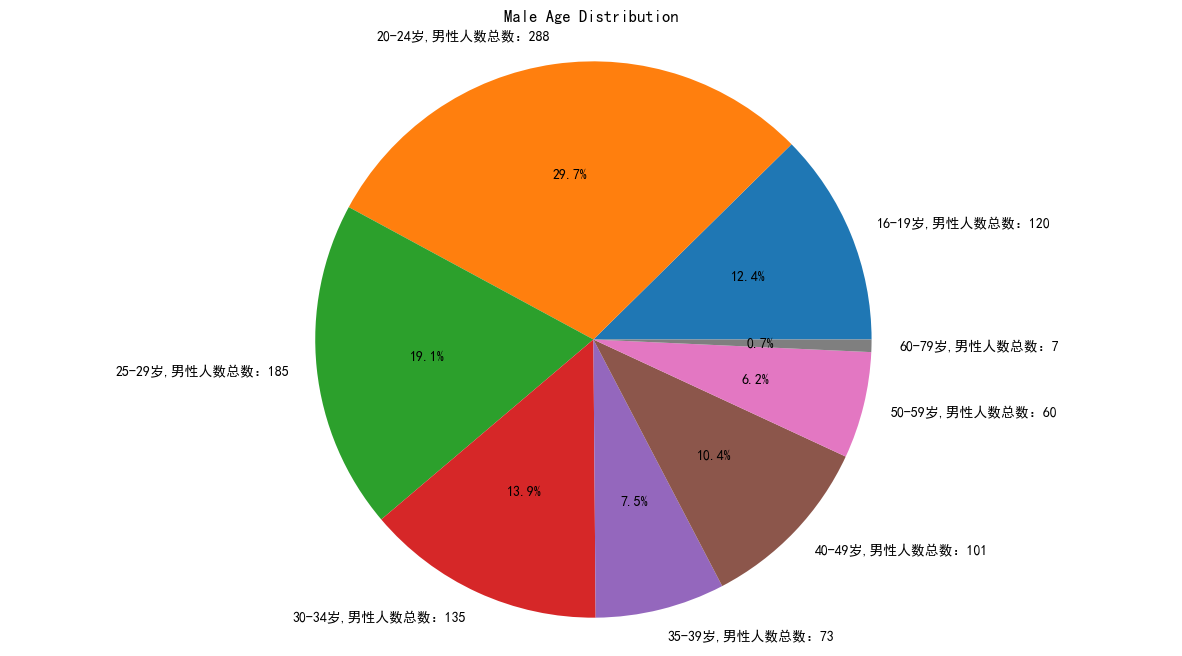

In [39]:
import matplotlib.pyplot as plt

# 年龄分割点
age_divide = [16, 20, 25, 30, 35, 40, 50, 60, 80]

# 统计各个年龄范围的女性数量
female_data = file_data[file_data["gender"] == "男"]
age_ranges_count = [sum(1 for age in female_data["age"] if bin_start <= age < bin_end) for bin_start, bin_end in zip(age_divide[:-1], age_divide[1:])]

# 计算每个组的起始值和结束值，用于饼图的标签
age_ranges = [f"{bin_start}-{bin_end-1}岁,男性人数总数：{count}" for bin_start, bin_end, count in zip(age_divide[:-1], age_divide[1:], age_ranges_count)]

# 绘制年龄分布的饼图
plt.figure(figsize=(15, 8))
plt.pie(age_ranges_count, labels=age_ranges, autopct='%1.1f%%')
plt.title("Male Age Distribution")
plt.axis('equal')  # 使饼图保持圆形
plt.show()